In [1]:
from agents.a2c import A2C
from agents.ppo import PPO
from agents.reinforce import REINFORCE
from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
import gym

# cartpole = VectorizedEnvWrapper(gym.make("CartPole-v0"), num_envs=8)
# categorical = CategoricalPolicy(cartpole, lr=1e-1)
# value_estimator = ValueEstimator(cartpole, lr=1e-2)
# totals_ppo = PPO(cartpole, categorical, value_estimator, epochs=100)
# categorical = CategoricalPolicy(cartpole, lr=1e-1)
# value_estimator = ValueEstimator(cartpole, lr=1e-2)
# totals_a2c = A2C(cartpole, categorical, value_estimator, epochs=100)
# categorical = CategoricalPolicy(cartpole, lr=1e-1)
# value_estimator = ValueEstimator(cartpole, lr=1e-2)
# totals_pg = REINFORCE(cartpole, categorical, epochs=100)

In [2]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})


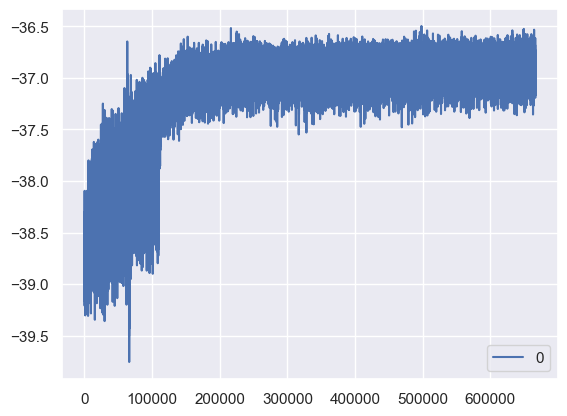

In [6]:
# run DQN on energy management 
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from agents.dqn import DeepQLearner, DQN
from learning_utils.replay_buffer import ReplayBuffer

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)
agent = DeepQLearner(energy_management, alpha=1e-4, gamma=1, epsilon_f=0.05)
replay_buffer = ReplayBuffer(batch_size=32)
_, returns = DQN(energy_management, agent, replay_buffer, T=2000000)

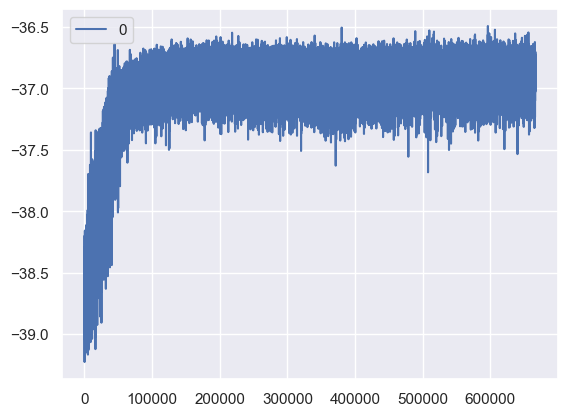

In [7]:
# run DQN on energy management 
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from agents.dqn import DeepQLearner, DQN
from learning_utils.replay_buffer import ReplayBuffer

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)
agent = DeepQLearner(energy_management, alpha=1e-4, gamma=1, epsilon_f=0.05, clip_grad = 1e6)
replay_buffer = ReplayBuffer(batch_size=32)
_, returns = DQN(energy_management, agent, replay_buffer, T=2000000)

In [1]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 1000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

# run DQN on energy management 
import numpy as np
import gym
import seaborn as sns
import matplotlib.pyplot as plt

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from agents.dqn import DeepQLearner, DQN
from learning_utils.replay_buffer import ReplayBuffer

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=32)
agent = DeepQLearner(energy_management, alpha=1e-4, gamma=1, epsilon_f=0.05, clip_grad = 1e6)
replay_buffer = ReplayBuffer(batch_size=32)
_, returns = DQN(energy_management, agent, replay_buffer, T=50000000)   